In [5]:
# Load library
import csv
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt


In [3]:
# Read the current data
data = pd.read_csv("data/data_2005.csv", encoding='utf-8')
data.head()

,Unnamed: 0,id,date,team_1,team_2,home_team,tournament,h_win_diff,h_draw,f_goalF_1,f_goalF_2,f_goalA_1,f_goalA_2,f_win_1,f_win_2,f_draw_1,f_draw_2,ratio_odds,avg_odds_draw,result
0,26944,26944.0,2005-01-02,Burma,Singapore,Singapore,AFF Championship,5.0,2.0,19.0,12.0,7.0,10.0,4.0,4.0,2.0,3.0,NaN,NaN,lose
1,26945,26945.0,2005-01-03,Indonesia,Malaysia,Malaysia,AFF Championship,8.0,11.0,24.0,22.0,16.0,11.0,4.0,5.0,2.0,0.0,NaN,NaN,win
2,26946,26946.0,2005-01-08,Egypt,Uganda,Egypt,Friendly,6.0,1.0,17.0,16.0,13.0,7.0,5.0,1.0,2.0,2.0,NaN,NaN,win
3,26947,26947.0,2005-01-08,Indonesia,Singapore,Indonesia,AFF Championship,8.0,7.0,20.0,15.0,18.0,12.0,4.0,5.0,2.0,3.0,NaN,NaN,lose
4,26948,26948.0,2005-01-08,French Guyana,Jamaica,Jamaica,CFU Caribbean Cup qualification,0.0,0.0,12.0,22.0,10.0,22.0,2.0,4.0,3.0,5.0,NaN,NaN,lose


In [ ]:
# Is there any difference between "form" of winning team and lose team
# How many time a bad-form team won a good-form team?
# What is a good-form / bad-form team?
# Is playing as "Home Team" better than playing as "Away Team"?
# Is ratio-odd usually right? How much are they likely to be correct?

In [19]:
# Is playing as "Home Team" better than playing as "Away Team"?
# find pair team_1 = home_team -> win, team_1 ~= home_team -> lose
home1 = data[(data.team_1 == data.home_team) & (data.result == 'win')]
home2 = data[(data.team_1 != data.home_team) & (data.result == 'lose')]


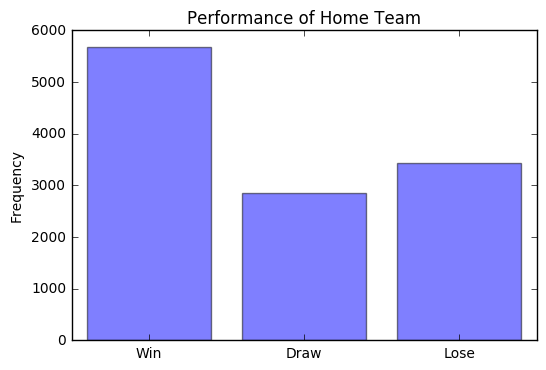

In [25]:

win = home1.shape[0] + home2.shape[0]
draw = data_2005[data_2005.result == 'draw'].shape[0]
lose = data_2005.shape[0] - win - draw

objects = ('Win', 'Draw', 'Lose')
y_pos = np.arange(len(objects))
performance = [win,draw,lose]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Frequency')
plt.title('Performance of Home Team')
 
plt.show()

In [47]:
# Consider history
win_result = data[data['result'] == 'win']
lose_result = data[data['result'] == 'lose']
draw_result = data[data['result'] == 'draw']

win_diff_win = pd.concat([win_result['h_win_diff'], -lose_result['h_win_diff']])
lose_diff_win = pd.concat([lose_result['h_win_diff'], -win_result['h_win_diff']])
draw_diff_win = draw_result['h_win_diff']

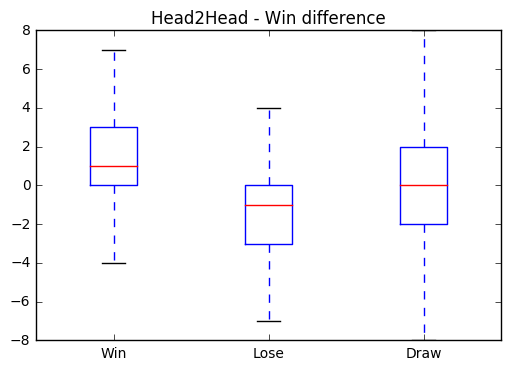

In [86]:
plt.figure()
plt.boxplot([win_diff_win,lose_diff_win,draw_diff_win],labels=['Win','Lose','Draw'],showfliers=False)

plt.title('Head2Head - Win difference')

plt.show()

In [87]:
ttest_ind(win_diff_win,lose_diff_win)

Ttest_indResult(statistic=35.432781367462361, pvalue=5.3865361955241691e-266)

In [61]:
# Is there any difference between "form" of winning team and lose team
# How many time a bad-form team won a good-form team?
# What is a good-form / bad-form team?

# fig, axes = plt.subplots(2, 4)
win_goalF  = pd.concat([win_result['f_goalF_1'], lose_result['f_goalF_2']])
lose_goalF = pd.concat([lose_result['f_goalF_1'], win_result['f_goalF_2']])
draw_goalF = pd.concat([draw_result['f_goalF_1'],draw_result['f_goalF_2']])

win_goalA  = pd.concat([win_result['f_goalA_1'], lose_result['f_goalA_2']])
lose_goalA = pd.concat([lose_result['f_goalA_1'], win_result['f_goalA_2']])
draw_goalA = pd.concat([draw_result['f_goalA_1'],draw_result['f_goalA_2']])

win_win  = pd.concat([win_result['f_win_1'], lose_result['f_win_2']])
lose_win = pd.concat([lose_result['f_win_1'], win_result['f_win_2']])
draw_win = pd.concat([draw_result['f_win_1'], draw_result['f_win_2']])

win_draw  = pd.concat([win_result['f_draw_1'], lose_result['f_draw_2']])
lose_draw = pd.concat([win_result['f_draw_1'], lose_result['f_draw_2']])
draw_draw = pd.concat([draw_result['f_draw_1'], draw_result['f_draw_2']])

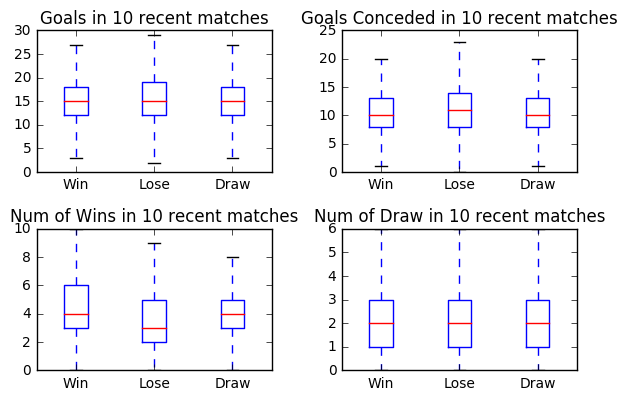

In [88]:
fig, axs = plt.subplots(2,2)
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
# Goals
axs[0,0].boxplot([win_goalF,lose_goalF,draw_goalF],labels=['Win','Lose','Draw'],showfliers=False)
axs[0,0].set_title('Goals in 10 recent matches')

# Goals Conceded
axs[0,1].boxplot([win_goalA,lose_goalA,draw_goalA],labels=['Win','Lose','Draw'],showfliers=False)
axs[0,1].set_title('Goals Conceded in 10 recent matches')

# Wins
axs[1,0].boxplot([win_win,lose_win,draw_win],labels=['Win','Lose','Draw'],showfliers=False)
axs[1,0].set_title('Num of Wins in 10 recent matches')

# Draw
axs[1,1].boxplot([win_draw,lose_draw,draw_draw],labels=['Win','Lose','Draw'],showfliers=False)
axs[1,1].set_title('Num of Draw in 10 recent matches')

plt.show()

In [64]:
# Is ratio-odd usually right? How much are they likely to be correct?

# Read the current data
data_odd = pd.read_csv("data/data_odd_match.csv", encoding='utf-8')
# data_2005.head()


In [66]:
# get average odd of win team, lose team
home_win = data_odd[data_odd.home_score > data_odd.away_score]
away_win = data_odd[data_odd.home_score < data_odd.away_score]

In [67]:
# home_win_avg_odd = home_win['avg_odds_home_win']
win_avg_odd = pd.concat([home_win['avg_odds_home_win'],away_win['avg_odds_away_win']])
lose_avg_odd = pd.concat([home_win['avg_odds_away_win'],away_win['avg_odds_home_win']])

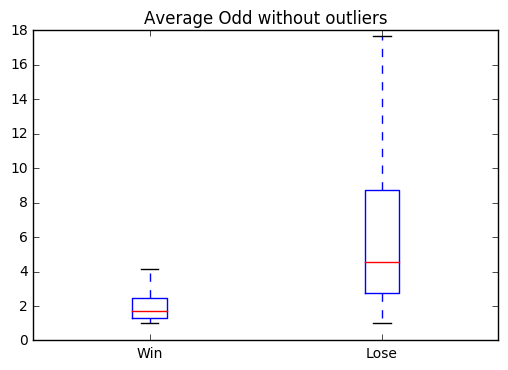

In [85]:
plt.figure()
plt.boxplot([win_avg_odd,lose_avg_odd],labels=['Win','Lose'],showfliers=False)
plt.title('Average Odd without outliers')
plt.show()

In [71]:
type(win_avg_odd)

pandas.core.series.Series

In [72]:
rvs1 = stats.norm.rvs(loc=5,scale=10,size=500)
type(rvs1)

numpy.ndarray

In [74]:
type(win_avg_odd.as_matrix)

method

In [76]:
from scipy.stats import ttest_ind
ttest_ind(rvs1,rvs2)

Ttest_indResult(statistic=-0.59224258066284774, pvalue=0.55382230830811707)

In [75]:
rvs1 = stats.norm.rvs(loc=5,scale=10,size=500)
rvs2 = stats.norm.rvs(loc=5,scale=10,size=500)
stats.ttest_ind(rvs1,rvs2)

Ttest_indResult(statistic=-0.59224258066284774, pvalue=0.55382230830811707)

In [77]:
from scipy import stats
stats.ttest_ind([1,2,3,4,5],[10,11,12,13,15], equal_var = False)
# (0.26833823296239279, 0.78849452749500748)

Ttest_indResult(statistic=-8.261843893231644, pvalue=4.2860932429809816e-05)

In [78]:
type(win_avg_odd.values)

numpy.ndarray

In [79]:
stats.ttest_ind(win_avg_odd.values,lose_avg_odd.values)

Ttest_indResult(statistic=-43.22461132125629, pvalue=0.0)

In [82]:
lose_avg_odd.mean()

7.3728006678452171

In [83]:
win_avg_odd.mean()

2.2082655470438031

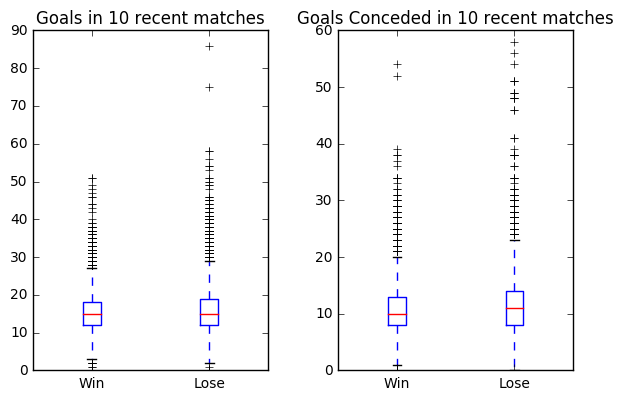

In [58]:
fig, axs = plt.subplots(1,2)
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
# basic plot
axs[0].boxplot([win_goalF,lose_goalF],labels=['Win','Lose'])
axs[0].set_title('Goals in 10 recent matches')

# notched plot
axs[1].boxplot([win_goalA,lose_goalA],labels=['Win','Lose'])
axs[1].set_title('Goals Conceded in 10 recent matches')

plt.show()

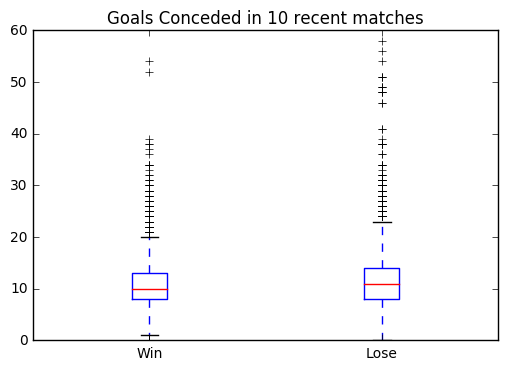

In [52]:
win_goalA = pd.concat([win_result['f_goalA_1'], lose_result['f_goalA_2']])
lose_goalA = pd.concat([lose_result['f_goalA_1'], win_result['f_goalA_2']])


plt.figure()
plt.boxplot([win_goalA,lose_goalA],labels=['Win','Lose'])
plt.title('Goals Conceded in 10 recent matches')
plt.show()

In [20]:
print(home1.shape[0])
print(home2.shape[0])

2779
2894


In [21]:
data_2005.shape[0]

11958

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000179B8A34390>], dtype=object)

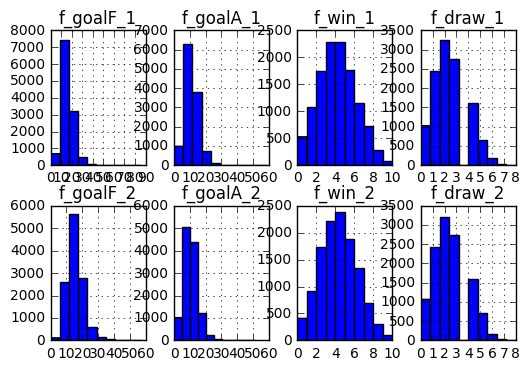

In [18]:
fig, axes = plt.subplots(2, 4)
data_2005.hist('f_goalF_1', ax=axes[0,0])
data_2005.hist('f_goalA_1', ax=axes[0,1])
data_2005.hist('f_win_1', ax=axes[0,2])
data_2005.hist('f_draw_1', ax=axes[0,3])

data_2005.hist('f_goalF_2', ax=axes[1,0])
data_2005.hist('f_goalA_2', ax=axes[1,1])
data_2005.hist('f_win_2', ax=axes[1,2])
data_2005.hist('f_draw_2', ax=axes[1,3])

# data_2005.hist('f_goalF_1',bins=100, ax=axes[0,0])
# data_2005.hist('f_goalA_1',bins=100, ax=axes[0,1])
# data_2005.hist('f_win_1',bins=100, ax=axes[0,2])
# data_2005.hist('f_draw_1',bins=100, ax=axes[0,3])

# data_2005.hist('f_goalF_2',bins=100, ax=axes[1,0])
# data_2005.hist('f_goalA_2',bins=100, ax=axes[1,1])
# data_2005.hist('f_win_2',bins=100, ax=axes[1,2])
# data_2005.hist('f_draw_2',bins=100, ax=axes[1,3])

In [ ]:
data = [data, d2, d2[::2, 0]]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data[:,[]])

plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000179B5DE3978>], dtype=object)

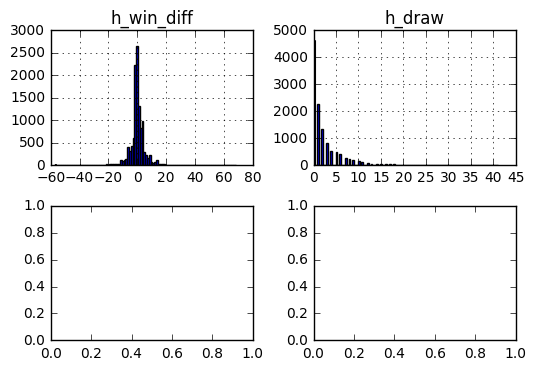

In [15]:
fig, axes = plt.subplots(2, 2)
data_2005.hist('h_win_diff',bins=100, ax=axes[0,0])
data_2005.hist('h_draw',bins=100, ax=axes[0,1])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000179B3E46F98>], dtype=object)

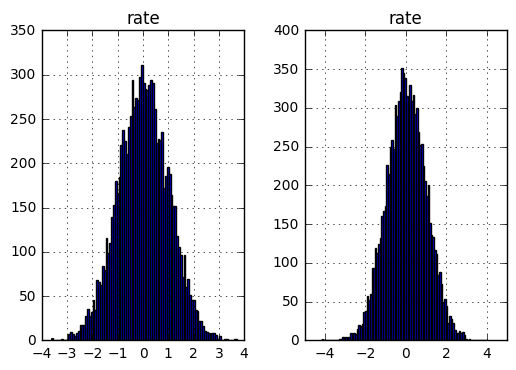

In [9]:
dflux = pd.DataFrame(dict(rate=np.random.randn(10000)))
dflux2 = pd.DataFrame(dict(rate=np.random.randn(10000)))

fig, axes = plt.subplots(1, 2)

dflux.hist('rate', bins=100, ax=axes[0])
dflux2.hist('rate', bins=100, ax=axes[1])

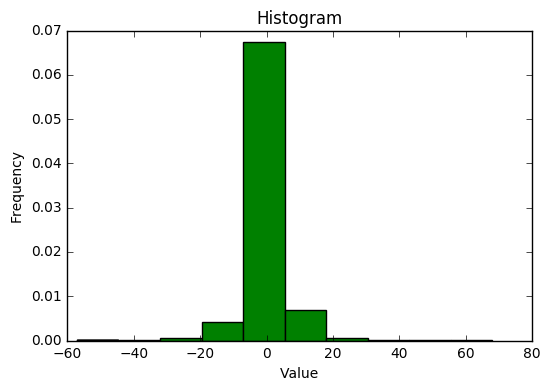

In [8]:
plt.hist(data_2005['h_win_diff'], facecolor='green')
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# import plotly.plotly as py
# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api

gaussian_numbers = np.random.randn(1000)
plt.hist(gaussian_numbers)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")